#### 교차 엔트로피

 - $H[p,q] = -\sum^K_{k=1}p(y_k)log_2q(y_k)$
 - $H[p,q] = -\int_y p(y)log_2q(y)dy$
 
 --- 
 p : X값이 정해졌을 때 정답인 Y의 확률분포 /
 q : X값이 정해졌을 때 예측값의 확률분포
 
 --> 분류의 성능이 좋을수록 작아지고 분류성능이 나쁠수록 커진다.
 
 ---
 
 #### 로그손실
 
  - $-\frac{1}{N}\sum^N_{i=1}(y_i log_2\mu_i+(1-y_i)log_2(1-\mu_i)$
  
 #### 카테고리 로그손실
  - $-\frac{1}{N}\sum^N_{i=1}\sum^K_{k=1}(\mathbb{I}(y_i=k) \log_2 p(y_i=k)$

In [62]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df['y'] = iris.target[idx]
df['y_hat'] = (df['sepal length (cm)'] > 5.4).astype(int)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,y_hat
95,5.7,3.0,4.2,1.2,1,1
96,5.7,2.9,4.2,1.3,1,1
97,6.2,2.9,4.3,1.3,1,1
98,5.1,2.5,3.0,1.1,1,0
99,5.7,2.8,4.1,1.3,1,1


In [63]:
from sklearn.metrics import log_loss
log_loss(df['y'], df['y_hat'])

3.799305383311686

----
#### 쿨백-라이블러 발산

 - $KL(p||q) = H[p,q] - H[p]$
 
----
#### 가변길이 인코딩과 쿨백-라이블러 발산

In [67]:
N = 200
p = [1/2, 1/4, 1/8, 1/8]
doc0 = list(''.join([int(N*p[i]) * c for i, c in enumerate('ABCD')]))
np.random.shuffle(doc0)
doc = ''.join(doc0)
doc

'AABADAADAABABAACAADBBADABAABACAAABAAABBADACBAAAAADBABBAAABCCBCBBBAADBADDCAAAABABACCABBDBABADCDDAAABDDAACAACBABAACCBBBDBCAAAABCCAABABBDABAABABBADBAAADADCBAAACAACDAABAABAADADBAAACADCCAACAAABACABABADAABA'

In [68]:
from collections import Counter
p = np.array(list(Counter(doc).values()))/len(doc)
p

array([0.5  , 0.25 , 0.125, 0.125])

In [69]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/8], base=2)

1.75

In [70]:
vl_encoder = {'A': '0', 'B': '10', 'C': '110', 'D': '111'}
vl_encoded_doc = ''.join([vl_encoder[c] for c in doc])
len(vl_encoded_doc)/len(doc)

1.75

In [71]:
encoder = {'A': '00', 'B': '01', 'C': '10', 'D': '11'}
encoded_doc = ''.join([encoder[c] for c in doc])
len(encoded_doc) / len(doc)

2.0

In [72]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/8], [1/4, 1/4, 1/4, 1/4], base=2)

0.24999999999999997

---
#### 상호정보량

 - $p(x,y) = p(x)p(y)$
 
 ----
 
  - mutual_info_score

In [75]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mutual_info_score

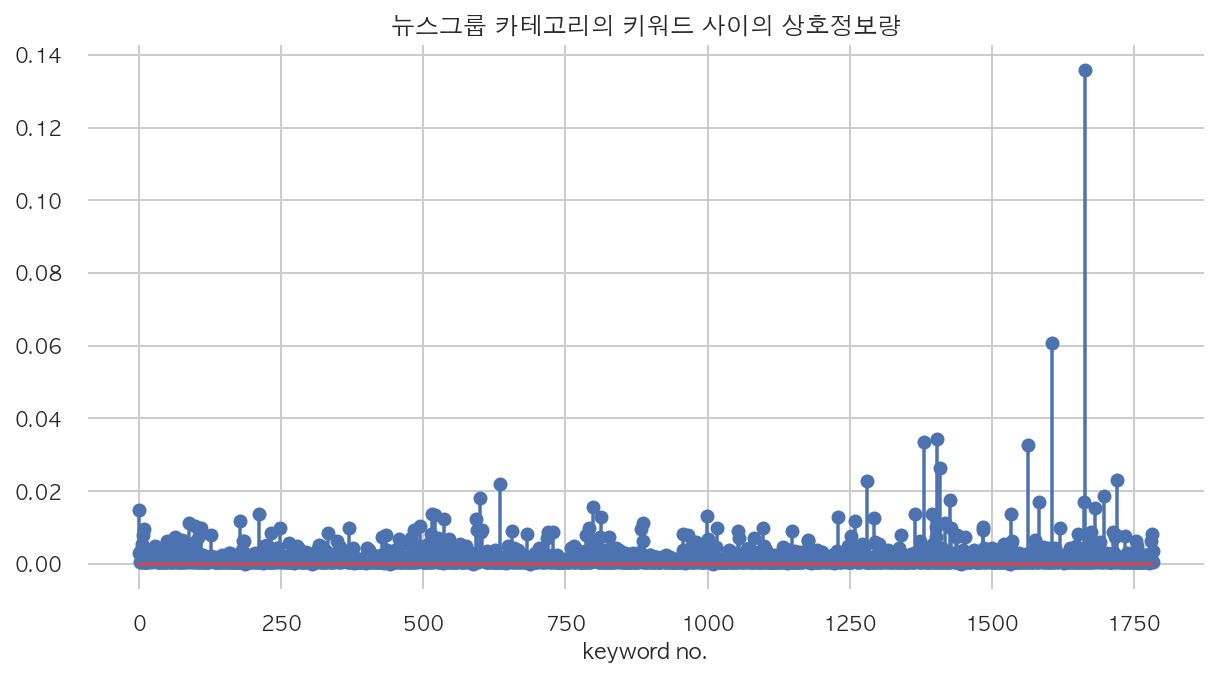

In [78]:
categories = ['rec.autos', 'sci.med', 'rec.sport.baseball']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
vect = CountVectorizer(stop_words='english', token_pattern='[a-zA-Z]+')
X = vect.fit_transform(newsgroups.data).toarray()
y = newsgroups.target

mi = np.array([mutual_info_score(X[:, i], y) for i in range(X.shape[0])])
plt.stem(mi)
plt.title('뉴스그룹 카테고리의 키워드 사이의 상호정보량')
plt.xlabel('keyword no.')
plt.show()

In [81]:
inv_vocabulary = {v: k for k, v in vect.vocabulary_.items()}
idx = np.flip(np.argsort(mi))
[inv_vocabulary[idx[i]] for i in range(10)]

['baseball',
 'banks',
 'automotive',
 'auto',
 'ball',
 'autos',
 'batting',
 'atlanta',
 'alomar',
 'bat']

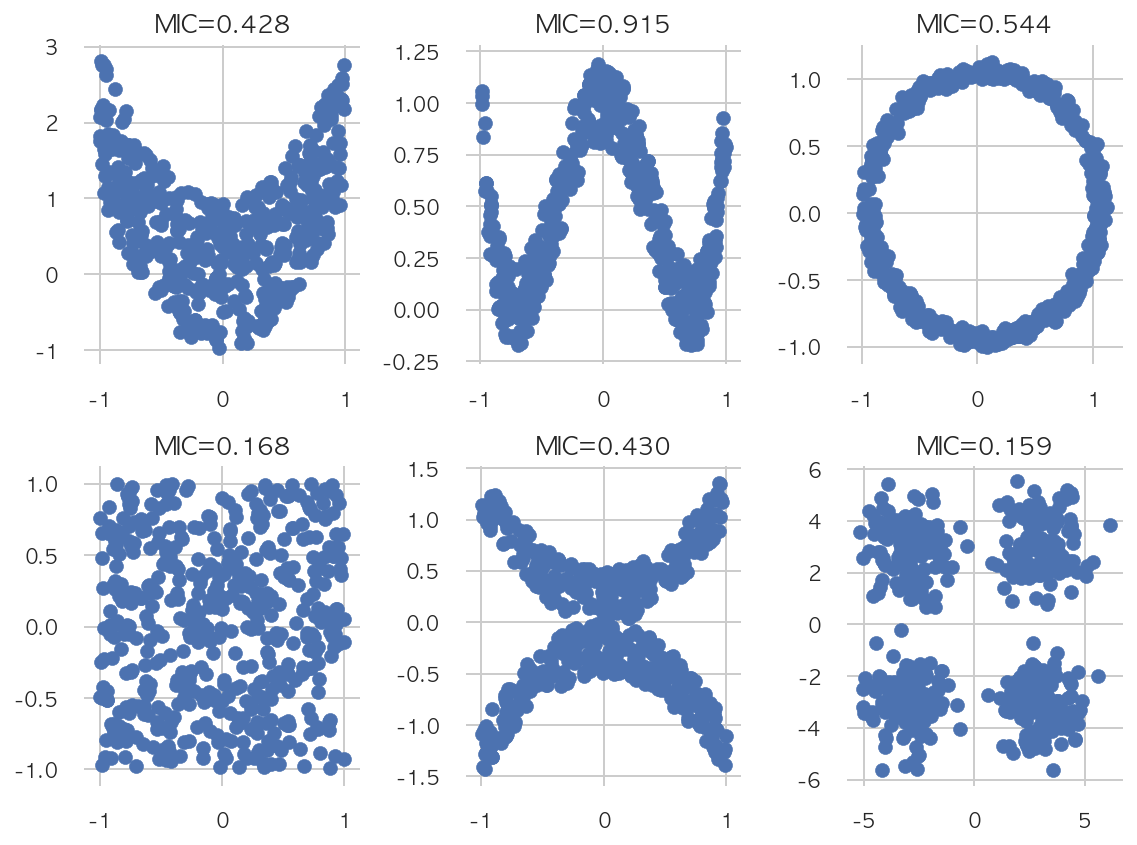

In [85]:
from minepy import MINE

mine = MINE()

n = 500

plt.figure(figsize=(8,6))

plt.subplot(231)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-1, 1, n)
plt.scatter(x1, y1)
mine.compute_score(x1, y1)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(232)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + np.random.uniform(-1, 1, n)/5
plt.scatter(x2, y2)
mine.compute_score(x2, y2)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(233)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
mine.compute_score(x3, y3)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(234)
x4 = np.random.uniform(-1, 1, n)
y4 = np.random.uniform(-1, 1, n)
plt.scatter(x4, y4)
mine.compute_score(x4, y4)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(235)
x5 = np.random.uniform(-1, 1, n)
y5 = (x5**2 + np.random.uniform(0, 0.5, n)) * np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x5, y5)
mine.compute_score(x5, y5)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(236)
xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
x6 = xy[:, 0]
y6 = xy[:, 1]
plt.scatter(x6, y6)
mine.compute_score(x6, y6)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.tight_layout()
plt.show()